In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("../desktop_summary_uw_f.csv","r") as fd:
    lines=fd.readlines()

summary_uw=[]
summary_uw_header=[]
for line in lines:
    larr=line.strip().split(',')
    if len(larr)!=10:
        continue #bad line
    if larr[0][0]=='#':
        summary_uw_header=larr
    else:
        summary_uw.append(larr)

In [3]:
i_n_samples=1
i_n_embs=2
i_org_cpu=3
i_cpu=5
i_gpu_v=7
i_gpu_3s=9

In [4]:
org_cpu_n_samples=[]
cpu_n_samples=[]
gpu_v_n_samples=[]
gpu_3s_n_samples=[]
n_embs=[]
org_cpu=[]
cpu=[]
gpu_v=[]
gpu_3s=[]
for el in summary_uw:
    n_samples=int(el[i_n_samples])
    if (n_samples%1000)!=0:
        continue # just the scaling
    n_embs.append(int(el[i_n_embs]))
    if el[i_org_cpu]!='':
        org_cpu_n_samples.append(int(el[i_n_samples]))
        org_cpu.append(int(el[i_org_cpu])/60.0)
    if el[i_cpu]!='':
        cpu_n_samples.append(int(el[i_n_samples]))
        cpu.append(int(el[i_cpu])/60.0)
    if el[i_gpu_v]!='':
        gpu_v_n_samples.append(int(el[i_n_samples]))
        gpu_v.append(int(el[i_gpu_v])/60.0)
    if el[i_gpu_3s]!='':
        gpu_3s_n_samples.append(int(el[i_n_samples]))
        gpu_3s.append(int(el[i_gpu_3s])/60.0)
    

In [5]:
#x = n_samples
#y = np.vstack([org_cpu,cpu,gpu_3s])

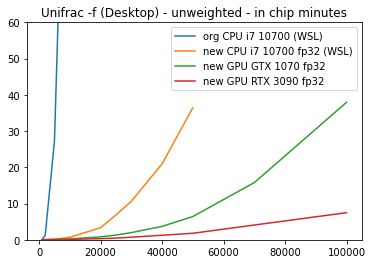

In [6]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(org_cpu_n_samples, org_cpu, label="org CPU i7 10700 (WSL)")
ax.plot(cpu_n_samples, cpu, label="new CPU i7 10700 fp32 (WSL)")
ax.plot(gpu_v_n_samples, gpu_v, label="new GPU GTX 1070 fp32")
ax.plot(gpu_3s_n_samples, gpu_3s, label="new GPU RTX 3090 fp32")

plt.ylim([0, 60])

plt.title("Unifrac -f (Desktop) - unweighted - in chip minutes")
ax.legend(loc='upper right')
plt.show()
